In [1]:
from src.environment import NormalMoveEnv
from src.experiment import Experiment
from src.nn import BetaModel, Model, GeneralModel
from src.rl import Agent, Trajectory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# %matplotlib inline
# cmd -> mlflow ui

# Envs

In [15]:
start = ([0.,-9.9],[9.9,-5.])
goals = [([-9.,8.],[-8.,9.])]

envs_params= [{
        # 'walls': [([-9.,-1.],[10., 1.])],
        'walls': [],
        'goals': goals,
        'start': start,
        'beta': lambda s: (s[1]>-4. and s[1]<4.)
    },
    {
        'walls': [],
        'goals': goals,
        'start': start,
        'beta': lambda s: (s[0]>-5. and s[0]<5.)
    }
]

envs = [NormalMoveEnv(**param) for param in envs_params]

# for env in envs:
#     env.plot()

In [3]:
experiment_name = 'test'
run_name = 'start'

In [4]:
import mlflow
from mlflow import MlflowException

try:
    exp_id = mlflow.create_experiment(experiment_name)
    exp = mlflow.get_experiment(exp_id)
except MlflowException as e:
    exp = mlflow.get_experiment_by_name(experiment_name)
    exp_id = exp.experiment_id

print('experiment_id:', exp_id)

experiment_id: 674998129463839315


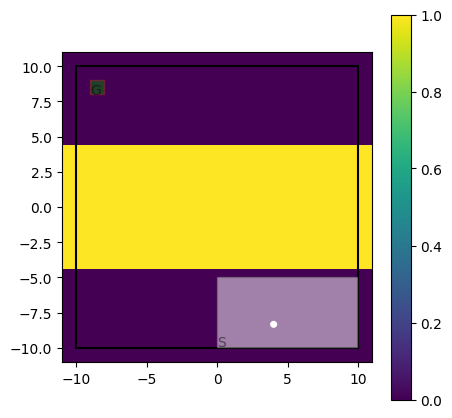

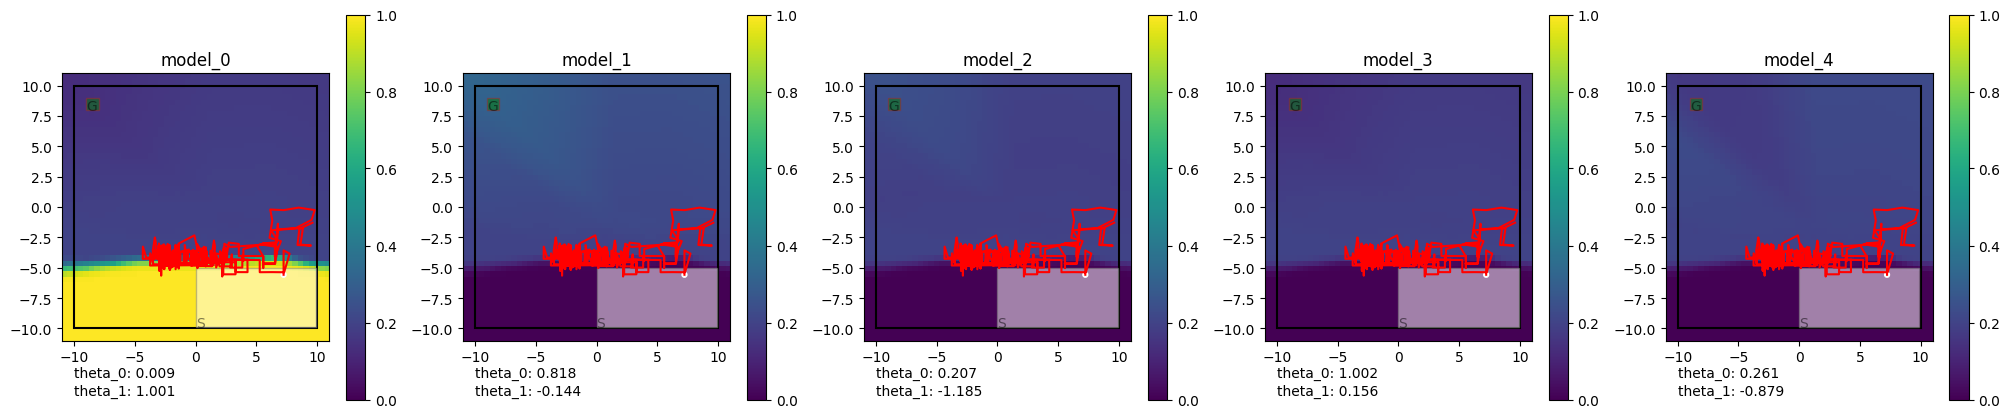

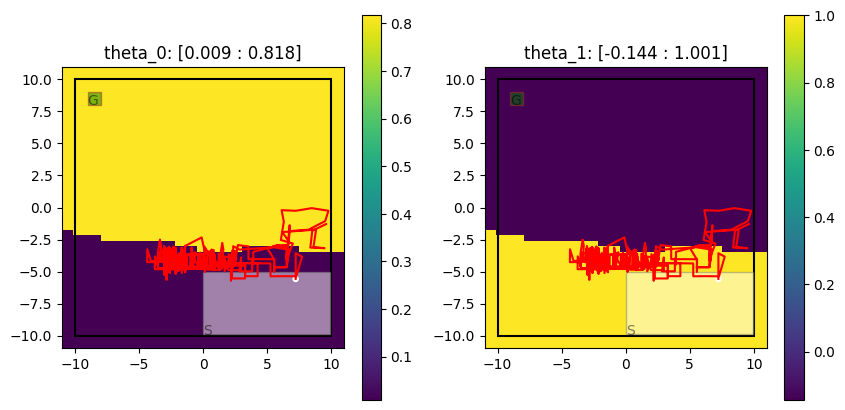

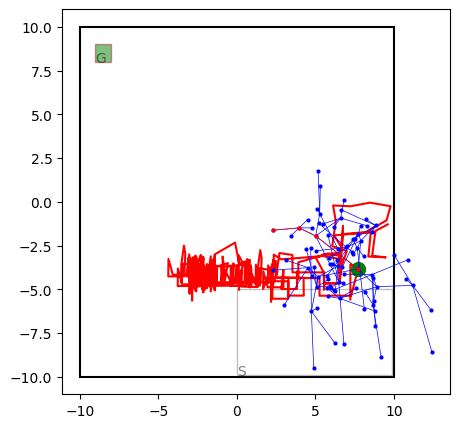

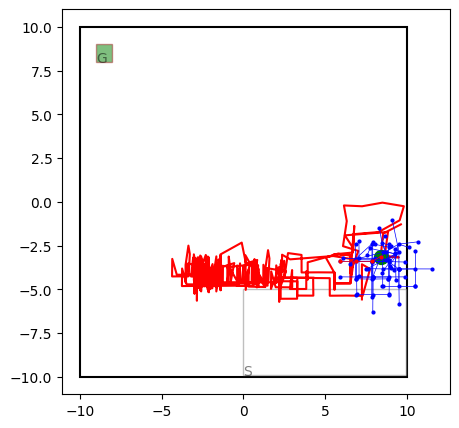

In [14]:
params = {
    'k':5, 
    "lr":1e-6, 
    'momentum':.9,
    'td_model_steps': 10, 
    'memory_size': 0, 
    'max_plan_size': 3, 
    'model': Model
}

with mlflow.start_run(experiment_id=exp_id, run_name=run_name):
    mlflow.log_params(params)
    mlflow.log_figure(envs[0].plot().get_figure(), f"env.png")

    a = Agent(envs[0], **params)
    a.episode(size_limit=300)

    mlflow.log_figure(a.plot(kind='probs'), "probs.png")
    mlflow.log_figure(a.plot(), "params.png")
    # for i, plan in enumerate(a.plans):
    #     mlflow.log_figure(a.plot(kind='plan', plan=i), f"plans/{i}.png")
    mlflow.log_figure(a.plot(kind='plan', plan=1), f"first_plan.png")
    mlflow.log_figure(a.plot(kind='plan', plan=0), f"last_plan.png")

    mlflow.log_metric("Trajectory Size", a.trajectory.run.shape[0])

Trajectory size: 80


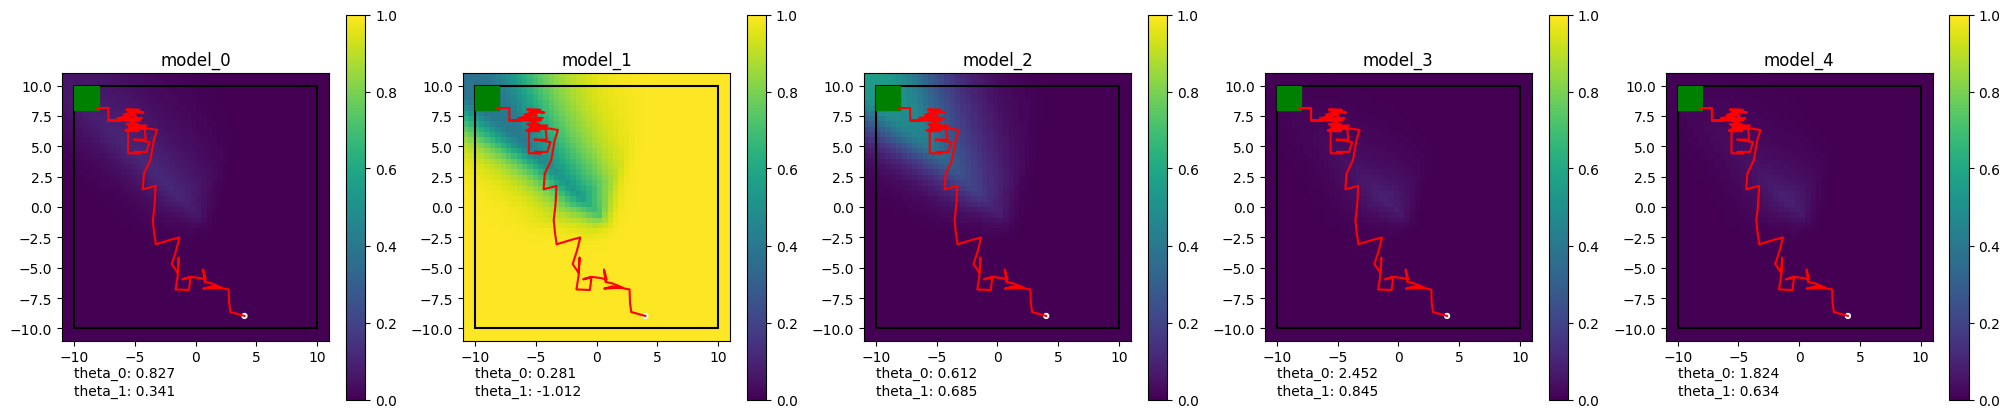

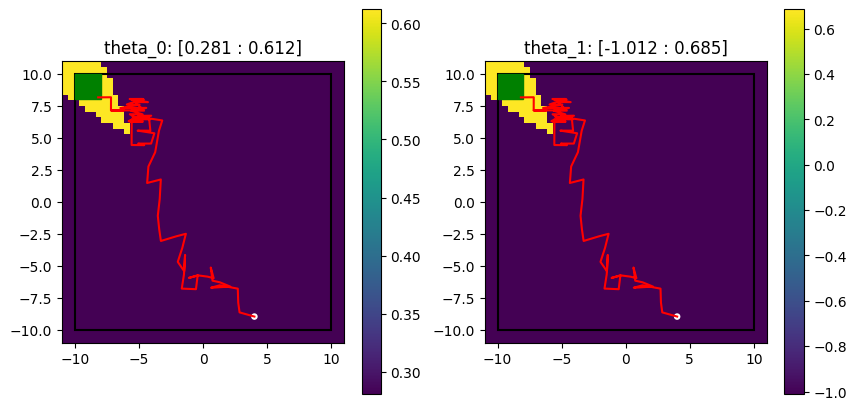

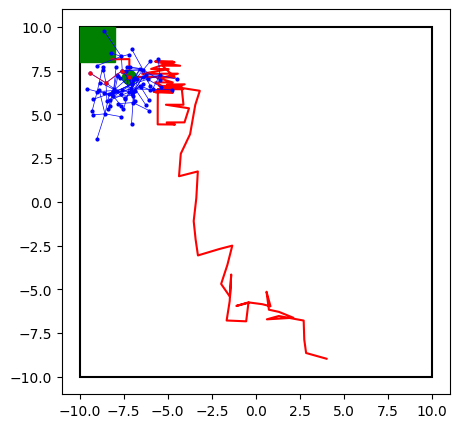

In [ ]:
a.env = env2
a.reset()
a.episode(size_limit=300)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

# General Model

Trajectory size: 191


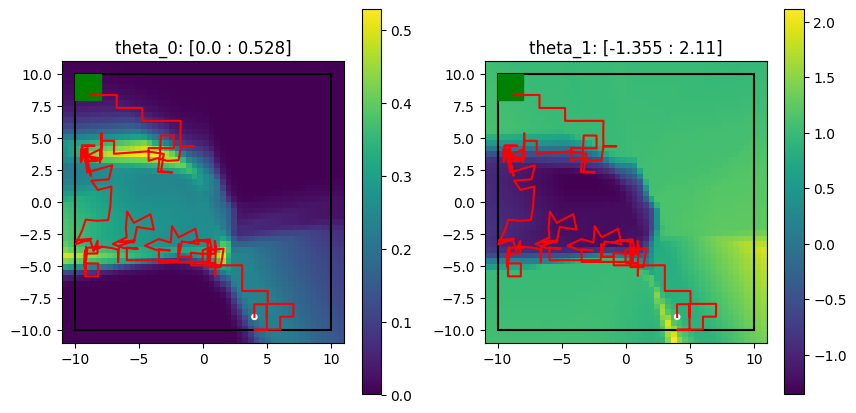

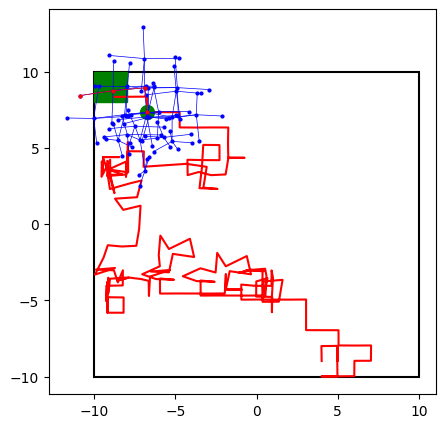

In [ ]:
params = {"lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=0, max_plan_size=3, model=GeneralModel, **params)
a.episode(size_limit=300)
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 99
plan size: 4


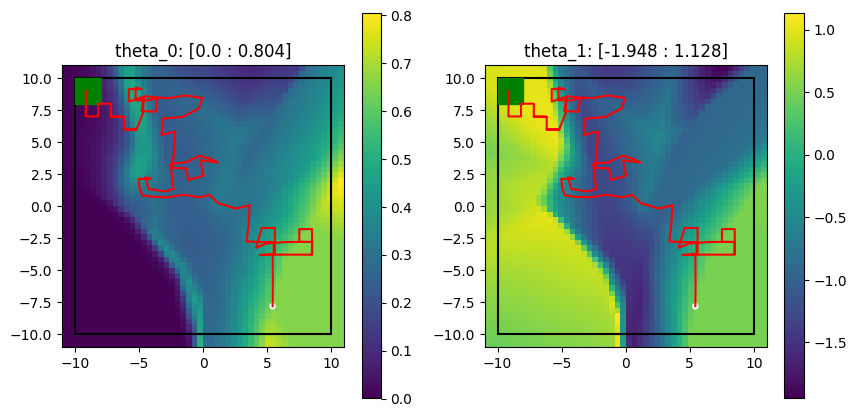

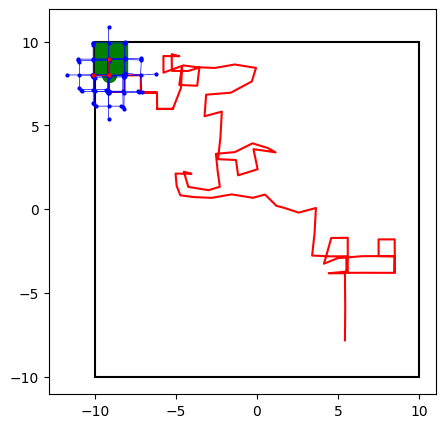

In [ ]:
a.env = env2
a.reset()
a.episode(size_limit=300)
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')
print(f'plan size: {len(a.plans[0])}')